# 📊 Analisis Penjualan Harian Coffee Shop – Cape Town, Maret 2024




## 📝 Dataset Description

This dataset records **daily sales transactions** from a coffee shop in Cape Town during **March 2024**. The information collected includes:

* Transaction date and time
* Payment method (card/cash)
* Type of coffee purchased
* Total revenue per transaction

This dataset is highly suitable for introductory data exploration, such as **time series analysis**, **data visualization**, or as practice material for **beginner data analytics projects**.

---

### 🧰 Column Description

| Column        | Description                                          |
| ------------- | ---------------------------------------------------- |
| `date`        | Transaction date (format: YYYY/MM/DD)                |
| `datetime`    | Full timestamp of when the transaction occurred      |
| `cash_type`   | Payment method (card or cash)                        |
| `card`        | Anonymous customer ID (based on loyalty card)        |
| `money`       | Amount spent per transaction (in South African Rand) |
| `coffee_name` | Type of coffee purchased                             |

---

### 🔍 Potential Analyses

Some possible analyses using this dataset include:

* 📅 Trends in the number of transactions and sales per day of the week
* ☕ Revenue distribution by coffee type
* 💳 Payment preferences: card vs cash
* 📈 Average transaction value and daily revenue
* 🕒 Peak hours of the day: morning, afternoon, or evening

---

### 🎨 Visualization Preview (Power BI)

The included Power BI dashboard showcases:

* Total sales, number of transactions, and average transaction value
* Revenue breakdown by coffee type
* Dual trend lines for daily sales and number of transactions
* Sales distribution by payment method

---

### 🌍 Why Is This Dataset Interesting?

Coffee sales data is highly **relevant, seasonal**, and well-suited for practicing:

* Time-based grouping techniques (day, week, hour)
* KPI design and business visualization
* Building interactive dashboards with **easy-to-digest insights**

---

> 📌 **Note**: This dataset can be used as a case study for both beginners and professionals to develop sales analysis and consumer behavior insights based on time-series data.

---


## Gatherin Data & Import Library

### Import Library

In [74]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Import Dataset

In [75]:
df = pd.read_excel('Coffe_sales.xlsx')
df.head()


,date,datetime,hour_of_day,cash_type,card,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort
0,2024-03-01,2024-03-01 10:15:50.520,10,card,ANON-0000-0000-0001,38.7,Latte,Morning,Fri,Mar,5,3
1,2024-03-01,2024-03-01 12:19:22.539,12,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3
2,2024-03-01,2024-03-01 12:20:18.089,12,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3
3,2024-03-01,2024-03-01 13:46:33.006,13,card,ANON-0000-0000-0003,28.9,Americano,Afternoon,Fri,Mar,5,3
4,2024-03-01,2024-03-01 13:48:14.626,13,card,ANON-0000-0000-0004,38.7,Latte,Afternoon,Fri,Mar,5,3


## Assesing Data

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3636 non-null   datetime64[ns]
 1   datetime     3636 non-null   datetime64[ns]
 2   hour_of_day  3636 non-null   int64         
 3   cash_type    3636 non-null   object        
 4   card         3547 non-null   object        
 5   money        3636 non-null   float64       
 6   coffee_name  3636 non-null   object        
 7   Time_of_Day  3636 non-null   object        
 8   Weekday      3636 non-null   object        
 9   Month_name   3636 non-null   object        
 10  Weekdaysort  3636 non-null   int64         
 11  Monthsort    3636 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 341.0+ KB


##### 🔎 Assessing Data

The initial dataset contains **3,636 rows** and **12 columns**.  
From the `df.info()` output, we can observe several key points:

- **datetime** and **date** columns are already in `datetime64[ns]` format  
- **money** column is stored as `float64` (representing sales amount)  
- Categorical columns such as **cash_type**, **coffee_name**, **Weekday**, and **Month_name** are stored as `object`  
- There are additional columns (**Monthsort** and **Weekdaysort**) that only serve as sorting indicators  
- The **card** column contains missing values (non-null count is lower than total rows)

In [77]:
dfix = df.copy()
dfix.drop(['Monthsort', 'Weekdaysort', 'card'], axis=1, inplace=True)

dfix.head()

,date,datetime,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name
0,2024-03-01,2024-03-01 10:15:50.520,10,card,38.7,Latte,Morning,Fri,Mar
1,2024-03-01,2024-03-01 12:19:22.539,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar
2,2024-03-01,2024-03-01 12:20:18.089,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar
3,2024-03-01,2024-03-01 13:46:33.006,13,card,28.9,Americano,Afternoon,Fri,Mar
4,2024-03-01,2024-03-01 13:48:14.626,13,card,38.7,Latte,Afternoon,Fri,Mar


##### 🗑️ Data Reduction
Since these columns are not relevant for the main analysis, they were removed:
- `Monthsort` → month order indicator (redundant)  
- `Weekdaysort` → weekday order indicator (redundant)  
- `card` → payment type with missing values, not essential for this analysis  

The dataset was copied into a new DataFrame called `dfix` to preserve the original dataset.  

In [78]:
dfix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3636 non-null   datetime64[ns]
 1   datetime     3636 non-null   datetime64[ns]
 2   hour_of_day  3636 non-null   int64         
 3   cash_type    3636 non-null   object        
 4   money        3636 non-null   float64       
 5   coffee_name  3636 non-null   object        
 6   Time_of_Day  3636 non-null   object        
 7   Weekday      3636 non-null   object        
 8   Month_name   3636 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 255.8+ KB


##### ✅ Final Result
After cleaning:
- The number of columns was reduced from **12** to **9**  
- Key columns (date, datetime, hour, payment type, money, coffee name, time of day, weekday, and month) were retained for further analysis  


## 📊 Exploratory Data Analysis (EDA)


### 1. Sales by Hour & Day
We start by analyzing transaction counts across different hours of the day.  
This helps identify peak hours when customer activity is highest. 

#### 1) Busiest Hour per Weeekdays

In [79]:
counts = dfix['datetime'].dt.hour.value_counts().sort_index()
counts

datetime
6       5
7      91
8     235
9     247
10    349
11    294
12    249
13    227
14    228
15    245
16    283
17    244
18    220
19    235
20    171
21    197
22    116
Name: count, dtype: int64

In [80]:
top3_hours = counts.sort_values(ascending=False).head(3).index.tolist()
top3_hours

[10, 11, 16]

In [81]:
bottom3_hours = counts.sort_values().head(3).index.tolist()
bottom3_hours

[6, 7, 22]


- **Top 3 busiest hours:** 10 AM, 11 AM, 4 PM  
- **Bottom 3 least busy hours:** 6 AM, 7 AM, 10 PM 

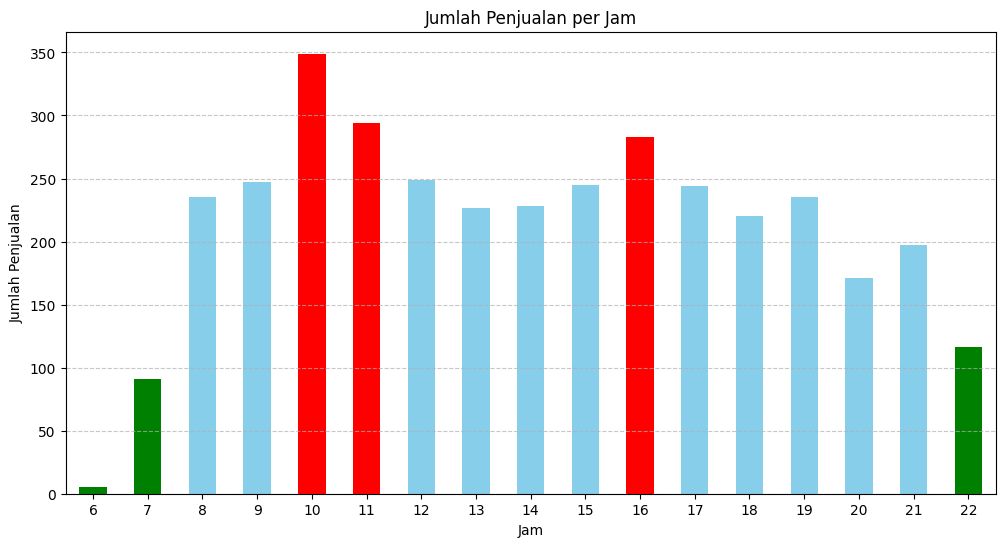

In [82]:
# Create list of colors based on conditions
# Red for top 3, green for bottom 3, skyblue for others
colors = [
    'red' if hour in top3_hours else
    'green' if hour in bottom3_hours else
    'skyblue'
    for hour in counts.index
]
# Plotting the bar chart with custom colors
counts.plot(kind='bar', figsize=(12, 6), color=colors)

# Tambahan visual
plt.title('Jumlah Penjualan per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penjualan')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The bar chart below highlights these hours in different colors:
- 🔴 **Red** → top 3 busiest hours  
- 🟢 **Green** → bottom 3 least busy hours  
- 🔵 **Blue** → all other hours  

This insight is useful for staffing, inventory preparation, and promotional planning.

#### 2) Busiest Days for Each Month

This visualization compares **total sales per weekday** across all months.  

Key steps performed:
- Converted `Weekday` column into an ordered categorical variable (Mon → Sun).  
- Grouped sales data by `Month_name` and `Weekday`.  
- Aggregated sales using `.sum()` to calculate the total revenue per day.  
- Visualized with a grouped bar chart (`sns.barplot`) to compare performance across months. 

In [83]:
dfix.head()

,date,datetime,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name
0,2024-03-01,2024-03-01 10:15:50.520,10,card,38.7,Latte,Morning,Fri,Mar
1,2024-03-01,2024-03-01 12:19:22.539,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar
2,2024-03-01,2024-03-01 12:20:18.089,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar
3,2024-03-01,2024-03-01 13:46:33.006,13,card,28.9,Americano,Afternoon,Fri,Mar
4,2024-03-01,2024-03-01 13:48:14.626,13,card,38.7,Latte,Afternoon,Fri,Mar


In [84]:
# Create a new column for the month name
order_days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# Convert 'Weekday' to categorical with specified order
dfix["Weekday"] = pd.Categorical(dfix["Weekday"], categories=order_days, ordered=True)

# Grouping by month and weekday to calculate total sales
daybusy = (
    dfix.groupby(["Month_name", "Weekday"])["money"]
    .sum()
    .reset_index(name="total_sales")
)

# Ordering the DataFrame by Month_name and Weekday
daybusy = daybusy.sort_values(["Month_name", "Weekday"])

daybusy.head()


,Month_name,Weekday,total_sales
0,Apr,Mon,1167.52
1,Apr,Tue,1045.36
2,Apr,Wed,764.46
3,Apr,Thu,828.18
4,Apr,Fri,991.08


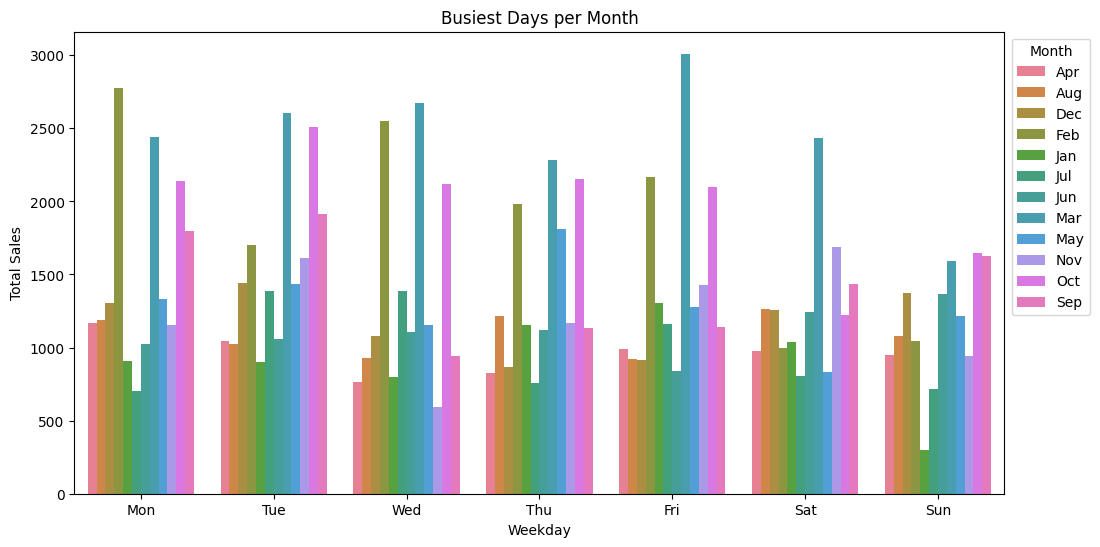

In [85]:
#Plotting the bar chart for busiest days per month
plt.figure(figsize=(12,6))
sns.barplot(x="Weekday", y="total_sales", hue="Month_name", data=daybusy)
plt.title("Busiest Days per Month")
plt.ylabel("Total Sales")
plt.xlabel("Weekday")
plt.legend(title="Month", loc = 'upper right', bbox_to_anchor = (1.1,1))
plt.show()


 

##### 📌 Key Insights
- **Fridays** consistently show higher sales across multiple months (e.g., March, July).  
- **Mondays and Tuesdays** also tend to have strong sales performance in some months (e.g., February, October).  
- **Weekends (Saturday & Sunday)** generally show lower sales compared to weekdays.  

This insight is valuable for business decision-making:  
- Allocate more staff and resources on **Fridays and early weekdays**.  
- Plan marketing promotions on lower-performing days (**weekends**) to balance customer traffic.  


### 2. Sales by Payment Type

This analysis explores the distribution of transactions based on payment methods.  
By using `value_counts()`, we count the number of transactions for each payment type, followed by a bar chart visualization.


In [86]:
# Count the occurrences of each cash type
df['cash_type'].value_counts(ascending=False)

cash_type
card    3547
cash      89
Name: count, dtype: int64


#### 📊 Key Observations:
- **Card payments dominate** the dataset with a significantly higher number of transactions.  
- **Cash payments** represent only a small fraction of the total sales.  

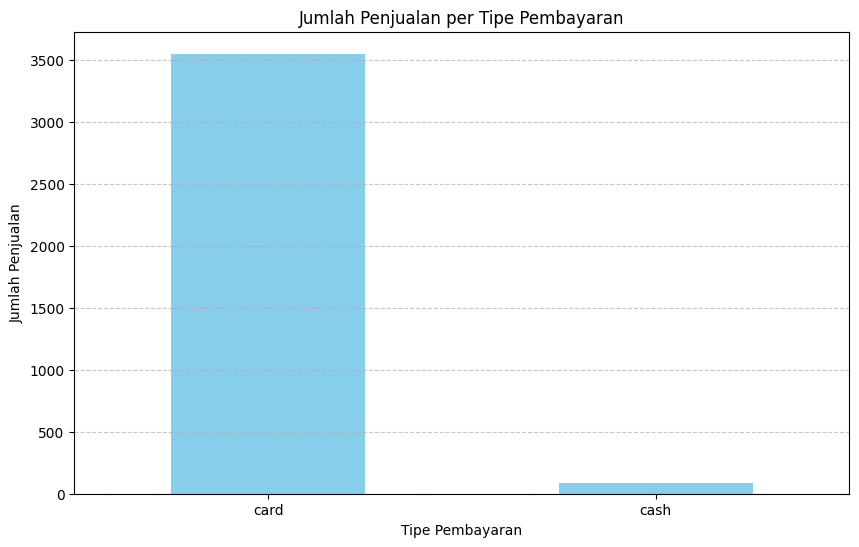

In [87]:
df['cash_type'].value_counts(ascending=False).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Jumlah Penjualan per Tipe Pembayaran')
plt.xlabel('Tipe Pembayaran')
plt.ylabel('Jumlah Penjualan')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 📌 Business Implications:
- The strong preference for **card payments** suggests customers rely heavily on cashless transactions.  
- Businesses should ensure that digital payment systems (e.g., credit/debit cards, mobile wallets) remain reliable and efficient.  
- Offering incentives (e.g., discounts or loyalty points) for cashless payments may further boost sales efficiency and customer satisfaction.  

### 3. Revenue by Day and Time of Day

This analysis examines the total revenue generated across different days of the week and times of day (Morning, Afternoon, Evening).  

In [88]:
# Grouping by weekday and time of day to calculate total sales
dfTimeBusy = dfix.groupby(['Weekday', 'Time_of_Day','Month_name'])['money'].sum().reset_index(name='count')
dfTimeBusy.head()

,Weekday,Time_of_Day,Month_name,count
0,Mon,Afternoon,Apr,215.28
1,Mon,Afternoon,Aug,274.30
2,Mon,Afternoon,Dec,518.26
3,Mon,Afternoon,Feb,1103.14
4,Mon,Afternoon,Jan,406.08


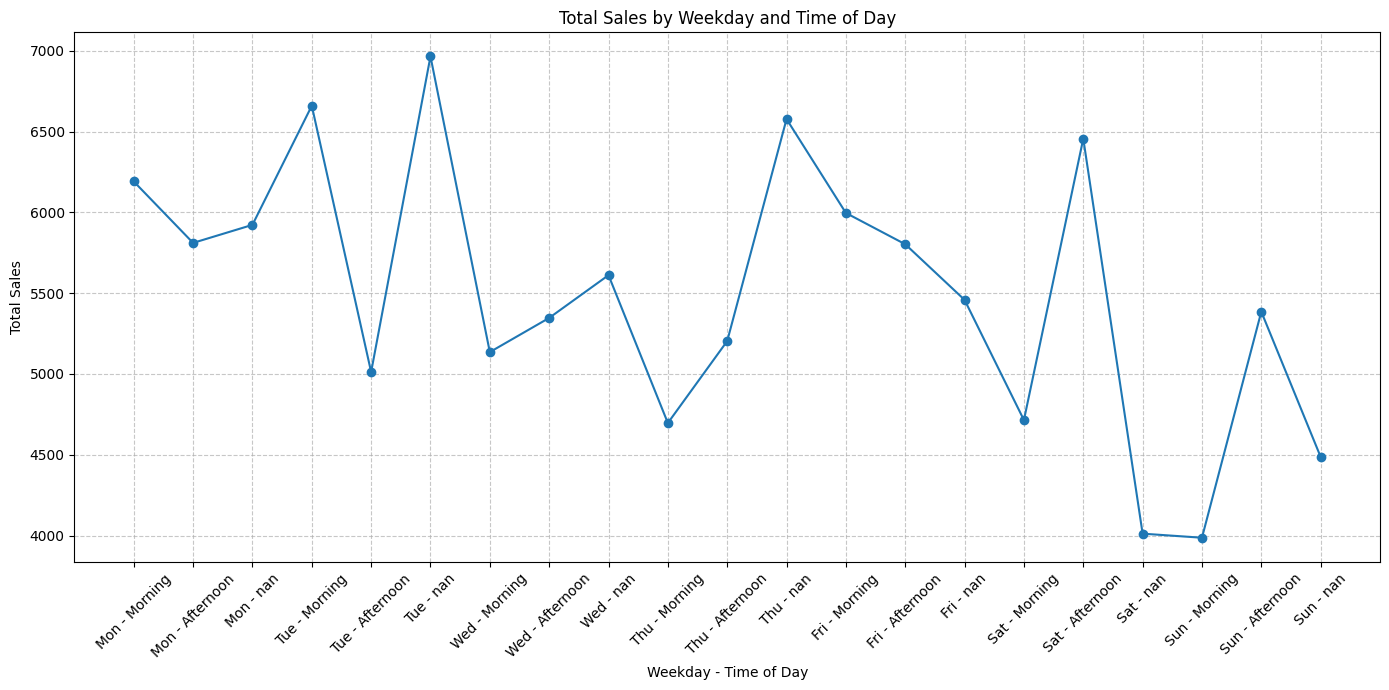

In [ ]:
# Create a new DataFrame for plotting
df_combo = dfix.groupby(['Weekday', 'Time_of_Day'])['money'].sum().reset_index()

# Define the order of weekdays and time of day for categorical sorting
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
time_order = ['Morning', 'Afternoon', 'Evening']

# Change the order of 'Weekday' and 'Time_of_Day' columns
df_combo['Weekday'] = pd.Categorical(df_combo['Weekday'], categories=weekday_order, ordered=True)
df_combo['Time_of_Day'] = pd.Categorical(df_combo['Time_of_Day'], categories=time_order, ordered=True)
df_combo = df_combo.sort_values(['Weekday', 'Time_of_Day'])

# 
df_combo['Label'] = df_combo['Weekday'].astype(str) + ' - ' + df_combo['Time_of_Day'].astype(str)

# Plotting the total sales by weekday and time of day
plt.figure(figsize=(14, 7))
plt.plot(df_combo['Label'], df_combo['money'], marker='o')
plt.title(' ')
plt.xlabel('Weekday - Time of Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



#### 📊 Key Observations:
- Revenue fluctuates across both weekdays and time slots.  
- **Tuesday Night** recorded the highest sales revenue, reaching close to 7,000.  
- **Saturday Night** had the lowest revenue, dropping below 4,100.  
- In general, **Morning and Afternoon periods on weekdays** contribute significantly more revenue than evenings, except for some peaks on Tuesday and Thursday nights. 

#### 📌 Business Implications:
- **Weekday mornings and afternoons** should be prioritized for promotions, staffing, and inventory readiness as they represent consistent high-revenue periods.  
- **Evening sales** (especially on weekends) appear weaker, suggesting opportunities for targeted promotions such as discounts, live events, or special menu items to boost traffic.  
- High sales on **Tuesday and Thursday nights** may indicate specific patterns (e.g., student discounts, after-work gatherings) that can be further leveraged.  


### Coffee Name Analysis Revenue

In [90]:
dfix.head()    

,date,datetime,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name
0,2024-03-01,2024-03-01 10:15:50.520,10,card,38.7,Latte,Morning,Fri,Mar
1,2024-03-01,2024-03-01 12:19:22.539,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar
2,2024-03-01,2024-03-01 12:20:18.089,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar
3,2024-03-01,2024-03-01 13:46:33.006,13,card,28.9,Americano,Afternoon,Fri,Mar
4,2024-03-01,2024-03-01 13:48:14.626,13,card,38.7,Latte,Afternoon,Fri,Mar


#### 1) Number of Sales by Coffee Type


In [91]:
# Count the occurrences of each coffee name
countofCoffeeName = dfix['coffee_name'].value_counts(ascending=False)
countofCoffeeName

coffee_name
Americano with Milk    824
Latte                  782
Americano              578
Cappuccino             501
Cortado                292
Hot Chocolate          282
Cocoa                  243
Espresso               134
Name: count, dtype: int64

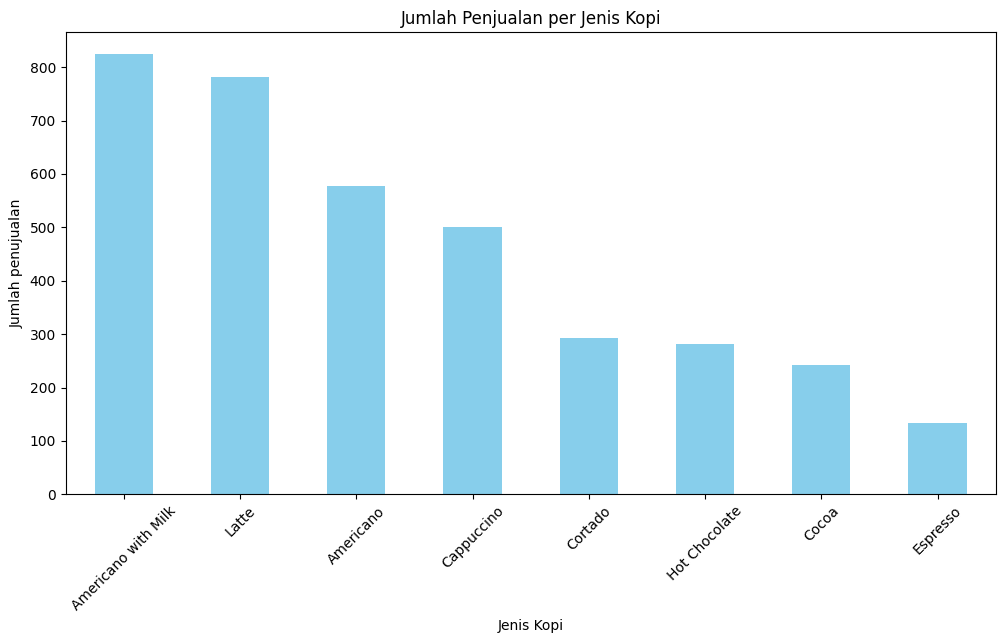

In [92]:
# Plotting the count of coffee names
plt.figure(figsize=(12, 6))
countofCoffeeName.plot(kind='bar', color='skyblue')
plt.title('Jumlah Penjualan per Jenis Kopi')
plt.xlabel('Jenis Kopi')
plt.ylabel('Jumlah penujualan')
plt.xticks(rotation=45)
plt.show()


##### 📊 Key Observations:
- **Americano with Milk** recorded the highest number of transactions (≈830).  
- **Latte** followed closely with ≈780 transactions.  
- **Americano** and **Cappuccino** showed medium performance (≈580–500 transactions).  
- Low-performing products include **Cortado, Hot Chocolate, Cocoa**, and the lowest: **Espresso** (≈130).  

##### 📌 Business Implications:
- Prioritize **Americano with Milk** and **Latte** as flagship products in promotions and inventory planning.  
- **Espresso** requires targeted strategies (bundling, discounts, or premium positioning) to improve sales.  
- **Cocoa & Hot Chocolate** could be marketed as secondary offerings, catering to non-coffee drinkers or family segments.

#### 2️) Active Months of Sales by Coffee Type

In [93]:
# 
groupCoffeeNamebyMonth = dfix.groupby(['coffee_name', 'Month_name'])['money'].sum().reset_index()
groupCoffeeNamebyMonth.head()

,coffee_name,Month_name,money
0,Americano,Apr,1001.94
1,Americano,Aug,851.74
2,Americano,Dec,700.92
3,Americano,Feb,3037.32
4,Americano,Jan,649.00


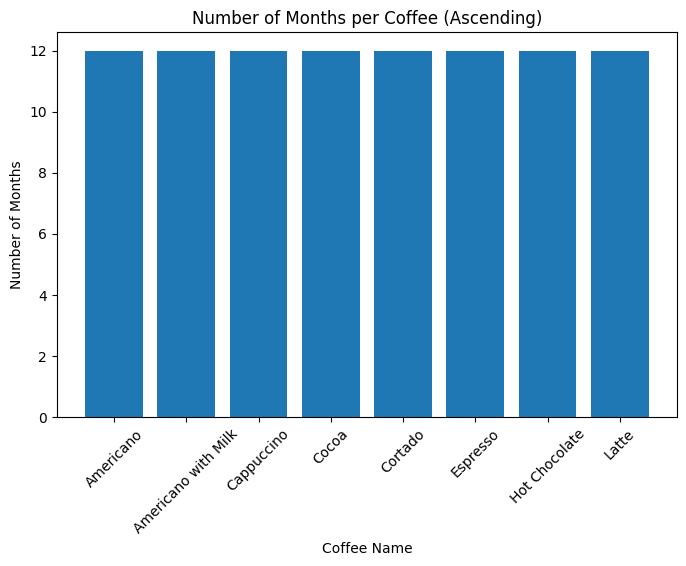

In [94]:

# Count distinct months for each coffee
month_count = dfix.groupby('coffee_name')['Month_name'].nunique().reset_index(name='month_count')

# Sort ascending
month_count = month_count.sort_values('month_count', ascending=True)

# Plot
plt.figure(figsize=(8,5))
plt.bar(month_count['coffee_name'], month_count['month_count'])
plt.xticks(rotation=45)
plt.xlabel("Coffee Name")
plt.ylabel("Number of Months")
plt.title("Number of Months per Coffee (Ascending)")
plt.show()



##### 📊 Key Observations:
- All coffee types were sold across **all 12 months**.  
- No product is seasonal, indicating consistent supply and demand throughout the year.  

##### 📌 Business Implications:
- Inventory planning can remain stable year-round without removing products from the menu.  
- Since all products maintain demand, the strategy should focus on **sales volume growth** and **pricing optimization** rather than product availability.  


In [95]:
groupCoffeeNamebyMonth = dfix.groupby(['coffee_name', 'Month_name'])['money'].sum().reset_index()
groupCoffeeNamebyMonth.head()

,coffee_name,Month_name,money
0,Americano,Apr,1001.94
1,Americano,Aug,851.74
2,Americano,Dec,700.92
3,Americano,Feb,3037.32
4,Americano,Jan,649.00


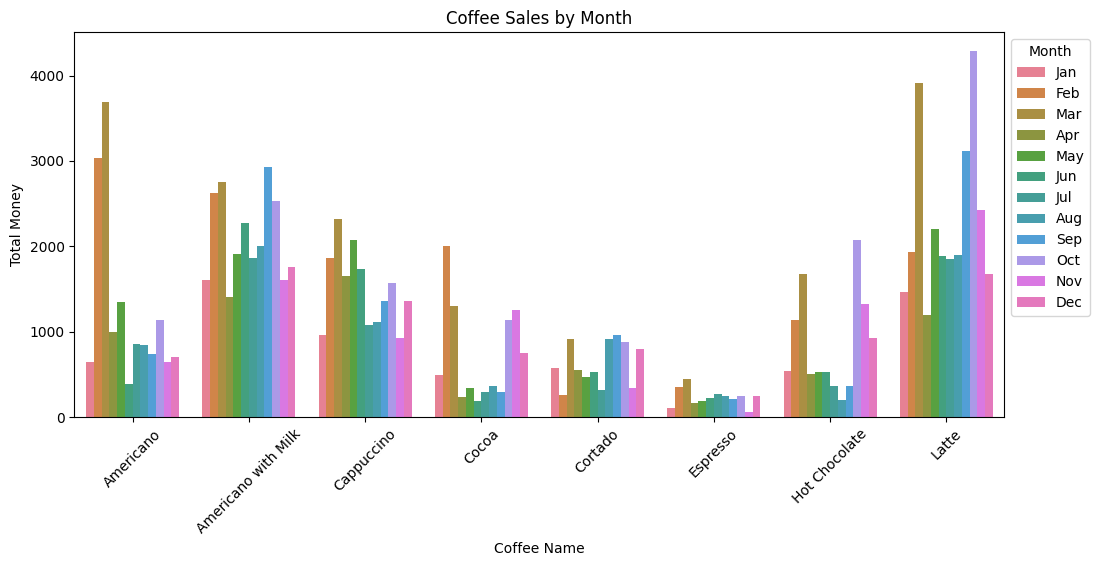

In [96]:
# Sort months by calendar order, from January to December
month_order = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
groupCoffeeNamebyMonth['Month_name'] = pd.Categorical(groupCoffeeNamebyMonth['Month_name'], categories=month_order, ordered=True)

# Plotting the total money spent on each coffee by month
plt.figure(figsize=(12,5))
sns.barplot(data=groupCoffeeNamebyMonth, x="coffee_name", y="money", hue="Month_name")
plt.xlabel("Coffee Name")
plt.ylabel("Total Money")
plt.xticks(rotation=45)
plt.title("Coffee Sales by Month")
plt.legend(title='Month', bbox_to_anchor=(1,1), loc='upper left')
plt.show()


 3️) Total Sales per Month (in Local Currency)

##### 📊 Key Observations:
- **Latte** consistently generated the highest revenue, peaking in **November** (≈4,200).  
- **Americano** showed strong spikes in **February (≈3,000)** and **March (≈3,700)**.  
- **Hot Chocolate** experienced significant growth during **October–November**, likely driven by colder weather.  
- **Cocoa, Cortado, and Espresso** maintained low contributions across all months.  

##### 📌 Business Implications:
- Position **Latte** as the core revenue driver, with potential seasonal variations (e.g., Pumpkin Latte, Ginger Latte) to maximize interest.  
- Leverage **Americano** demand at the beginning of the year through targeted promotions (e.g., New Year campaign).  
- Market **Hot Chocolate** as a **seasonal end-of-year product** to capitalize on its natural demand increase.  
- For low-contribution items (**Espresso, Cocoa, Cortado**), implement bundling, menu redesign, or specialty campaigns to boost visibility.  

---

### 📌 Executive Summary
1. **Americano with Milk** and **Latte** are the best-selling items.  
2. Every coffee type sells consistently across all 12 months.  
3. **Latte** stands out as the main revenue contributor year-round.  
4. Seasonal patterns exist: **Americano peaks early in the year** and **Hot Chocolate rises in late months**.  
5. Underperforming products can be optimized via promotions, bundling, and innovation.  

In [97]:
dfix.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5 non-null      datetime64[ns]
 1   datetime     5 non-null      datetime64[ns]
 2   hour_of_day  5 non-null      int64         
 3   cash_type    5 non-null      object        
 4   money        5 non-null      float64       
 5   coffee_name  5 non-null      object        
 6   Time_of_Day  5 non-null      object        
 7   Weekday      5 non-null      category      
 8   Month_name   5 non-null      object        
dtypes: category(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 813.0+ bytes


### Average Income Daily

In [98]:
# Grouping by date to calculate daily income
dailyIncome = dfix.groupby('date')['money'].sum().reset_index(name='daily_income')

# Calculate average daily income
avgDailyIncome = dailyIncome['daily_income'].mean()
print(f"Rata-rata pendapatan harian: {avgDailyIncome:.2f}")

Rata-rata pendapatan harian: 302.97


In [99]:
# Grouping by date to calculate daily income
dfix['Month_name'].value_counts(ascending=False)

Month_name
Mar    525
Oct    426
Feb    423
Sep    344
Aug    272
May    267
Nov    259
Dec    259
Jul    237
Jun    227
Jan    201
Apr    196
Name: count, dtype: int64

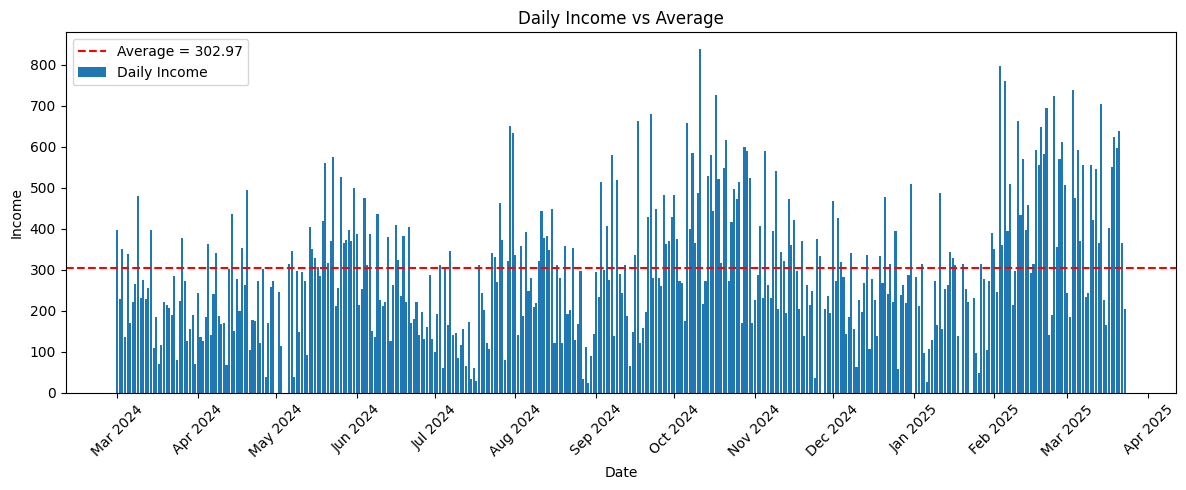

In [100]:
# Plotting daily income with average line
# import matplotlib.dates as mdates for date formatting
import matplotlib.dates as mdates
plt.figure(figsize=(12,5))
plt.bar(dailyIncome['date'], dailyIncome['daily_income'], label='Daily Income')

# Line for average daily income
plt.axhline(avgDailyIncome, color='red', linestyle='--', label=f'Average = {avgDailyIncome:.2f}')

# Format x-axis to show months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))   # tiap 1 bulan
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # format: Jan 2025

# Rotate x-axis labels for better readability
plt.xlabel("Date")
plt.ylabel("Income")
plt.title("Daily Income vs Average")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 4. Daily Income vs Average  

---

#### Key Observations:  
- The **average daily income** is approximately **303**.  
- Daily and monthly income fluctuates significantly, ranging from near **0** up to more than **800**.  
- Several periods (notably **October 2024** and **February–March 2025**) show income levels well above the average line.  
- There are frequent days where income falls **below the average threshold**, indicating volatility.  

---

#### Business Implications:  
- The overall performance trend is **positive**, but high variability suggests potential issues with **demand consistency** or **operational factors**.  
- Income peaks may correspond with **seasonal events, promotions, or external factors** (e.g., holidays, weekends, weather).  
- To stabilize income, management could:  
  - Introduce **loyalty programs** to smoothen demand on low-income days.  
  - Leverage **seasonal high-demand periods** with strategic promotions.  
  - | Conduct further analysis to identify **drivers behind volatility** (e.g., product mix, weekdays vs weekends).  

---

#### Executive Insight:  
While the business generates healthy daily revenue with an average around **303**, fluctuations highlight the importance of **demand forecasting and promotional strategy** to reduce income instability and enhance long-term profitability.  



## 📌 Overall Business Conclusion

The analysis of sales patterns, payment preferences, product performance, and revenue distribution provides valuable insights for strategic decision-making.

1. **Sales by Hour and Day**

   * Peak demand occurs around **10 AM, 11 AM, and 4 PM**, while early mornings (**6–7 AM**) and late nights (**10 PM**) are least active.
   * **Fridays** consistently generate the highest sales, followed by **Mondays and Tuesdays**, while **weekends** (Saturday–Sunday) remain weaker.
   * **Business Implication:** Allocate more staff and resources during **Fridays and weekday mornings/afternoons**, while targeting weekends with promotional campaigns to balance customer traffic.

2. **Payment Methods**

   * **Card payments dominate** the dataset, while cash usage remains minimal.
   * **Business Implication:** Ensure robust digital payment systems and consider offering **incentives (e.g., discounts, loyalty points)** to strengthen customer adoption of cashless transactions.

3. **Revenue by Day & Time of Day**

   * Highest revenue is observed on **Tuesday nights (\~7,000)**, while the lowest occurs on **Saturday nights (<4,100)**.
   * Weekday mornings and afternoons drive the majority of revenue.
   * **Business Implication:** Focus on **weekday daytime periods** for inventory and staffing, while introducing **evening/weekend promotions** (events, discounts, special menus) to improve weaker performance.

4. **Coffee Product Analysis**

   * **Americano with Milk** and **Latte** are the **best-selling products**, while **Espresso, Cortado, Cocoa, and Hot Chocolate** underperform.
   * **Latte consistently leads in revenue**, especially in November (\~4,200).
   * **Americano** peaks in February–March, while **Hot Chocolate** grows strongly in October–November, likely due to seasonal demand.
   * **Business Implication:**

     * Position **Latte** and **Americano with Milk** as flagship products.
     * Market **Hot Chocolate** as a seasonal end-of-year drink.
     * Implement **bundling and promotional strategies** for underperforming products to boost visibility and sales.

5. **Daily Income vs. Average**

   * The **average daily income is \~303**, but revenue fluctuates significantly, ranging from near **0 to over 800**.
   * Peaks often align with **seasonal events or promotions**, while low periods suggest inconsistent demand.
   * **Business Implication:**

     * Use **loyalty programs** to reduce volatility on low-income days.
     * Capitalize on **high-demand seasons** with targeted campaigns.
     * Conduct deeper analysis to identify **demand drivers** and optimize operations.

---

### 📊 Executive Summary

1. **Latte** and **Americano with Milk** are the top-performing and most profitable products.
2. **Fridays and weekday mornings/afternoons** are the most profitable time slots.
3. **Card payments dominate**, highlighting the need for strong digital transaction systems.
4. **Hot Chocolate shows seasonal potential**, particularly at year-end.
5. Income variability requires **better demand forecasting and promotional strategies**.

---

👉 In short, the business is performing strongly but can further improve **profitability, stability, and growth** through **strategic staffing, promotional campaigns, and product positioning**.




In [101]:
dfix.to_excel('coffeeDataSales_cleaned.xlsx', index=False)